In [23]:
# Mall Customers - Unsupervised Learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Importing the dataset
dataset = pd.read_csv("/content/drive/MyDrive/internship1/Mall_Customers.csv")
df = dataset.copy()


In [26]:
# Visualizing data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
# GEtting the insides of the data
df.isnull().sum()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Gender              200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual Income (k$)  200 non-null    int64 
 4   Spending Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [28]:
# Making  the independent variables matrix
X = df.iloc[:, [3, 4]].values   # 3 & 4 column for ploting
#print(X) 
# One Hot Encoding the categorical data - Gender
df = pd.get_dummies(df, columns = ['Gender'], prefix = ['Gender'])
#print(df)

In [29]:
#Using KMeans for clustering
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)   
print(wcss)     #varience values are stored in empty list wcss

font_title = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 35}

font_axes = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 28}


[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37265.86520484347, 30259.65720728547, 25036.417604033984, 21850.165282585633, 20065.21982804018]


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


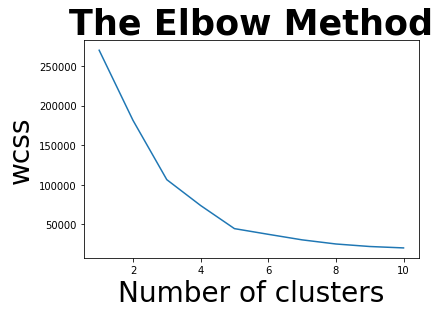

In [30]:
#---------------------------------------------Elbow_method---------------------------------------------------#
#Plotting Number of Clusters Vs wcss - The Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', **font_title)
plt.xlabel('Number of clusters', **font_axes)
plt.ylabel('wcss', **font_axes)
plt.show()

In [33]:
#----------------------------------------------Clustering------------------------------------------------------#
#Taking number of clusters = 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10)
#print(kmeans)
y_kmeans = kmeans.fit_predict(X)
#print(y_kmeans)

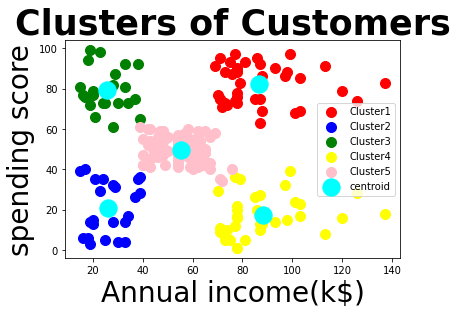

In [34]:
# PLotting the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'pink', label = 'Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='cyan',label='centroid')
plt.title('Clusters of Customers', **font_title)
plt.xlabel('Annual income(k$)', **font_axes)
plt.ylabel('spending score', **font_axes)
plt.legend()
plt.show()